# Evaluation of Cross Lingual
create plot to compare the different datasats and the different metrics

In [2]:
# dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# data

# testing with urdu
train_english_test_urdu = pd.read_csv('train_english_test_urdu.csv')
train_german_test_urdu = pd.read_csv('train_german_test_urdu.csv')
train_italian_test_urdu = pd.read_csv('train_italian_test_urdu.csv')

# training with urdu
train_urdu_test_english = pd.read_csv('train_urdu_test_english.csv')
train_urdu_test_german = pd.read_csv('train_urdu_test_german.csv')
train_urdu_test_italian = pd.read_csv('train_urdu_test_italian.csv')
df_melted = train_english_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")

# baselines
baseline_english = pd.read_csv(r'..\Baseline\english_results.csv') 
baseline_german = pd.read_csv(r'..\Baseline\german_results.csv')
baseline_italian = pd.read_csv(r'..\Baseline\italian_results.csv')
baseline_urdu = pd.read_csv(r'..\Baseline\urdu_results.csv')


In [4]:
# Melt the DataFrame to long format for easier plotting
train_english_test_urdu = train_english_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_german_test_urdu = train_german_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_italian_test_urdu = train_italian_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")

train_urdu_test_english = train_urdu_test_english.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_urdu_test_german = train_urdu_test_german.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_urdu_test_italian = train_urdu_test_italian.melt(id_vars="Model", var_name="Metric", value_name="Score")



In [5]:
# combine dataframes
dfs = [baseline_german, baseline_english, baseline_italian, baseline_urdu]
names = ['German', 'English', 'Italian', 'Urdu']
combined_df_baseline = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(dfs, names)],
        ignore_index=True
    )

# combine dataframes
df_test_urdu = [train_german_test_urdu, train_english_test_urdu, train_italian_test_urdu]
names = ['German', 'English', 'Italian']
combined_dfs_test_urdu = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_test_urdu, names)],
        ignore_index=True
    )

df_train_urdu = [train_urdu_test_english, train_urdu_test_german, train_urdu_test_italian]
names = ['English', 'German', 'Italian']
combined_dfs_train_urdu = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_train_urdu, names)],
        ignore_index=True
    )

In [6]:
combined_dfs_train_urdu

,Model,Metric,Score,Dataset
0,SVM (linear),Accuracy,0.510417,English
1,SVM (rbf),Accuracy,0.543750,English
2,Logistic Regression,Accuracy,0.512500,English
3,Random Forest,Accuracy,0.460417,English
4,XGBoost,Accuracy,0.495833,English
...,...,...,...,...
85,SVM (rbf),F1-Score (Weighted),0.561519,Italian
86,Logistic Regression,F1-Score (Weighted),0.518041,Italian
87,Random Forest,F1-Score (Weighted),0.489652,Italian
88,XGBoost,F1-Score (Weighted),0.538226,Italian


In [7]:
# plot
def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    sns.barplot(x="Metric", y="Score", hue="Model", data=df, palette="viridis")
    plt.title(title)
    plt.xlabel("Score", fontsize = 12)
    plt.ylabel("Model", fontsize = 12)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [8]:
def plot_crosslingual_vs_baseline(df_baseline, df_comparison, datasets,titel):

    baseline_scores = [df_baseline[df_baseline['Dataset'] == ds]['Score'].values[0] for ds in datasets]
    comparison_scores = [df_comparison[df_comparison['Dataset'] == ds]['Score'].values[0] for ds in datasets]

    sns.set_style("whitegrid")
    x = np.arange(len(datasets))
    width = 0.35
    colors = sns.color_palette("viridis", 2)

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, comparison_scores, width, label='Cross Lingual', color=colors[0])
    rects2 = ax.bar(x + width/2, baseline_scores, width, label='Baseline', color=colors[1])

    ax.set_ylabel('Accuracy (%)')
    ax.set_title(titel)
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    plt.tight_layout()
    plt.show()

### testing with urdu

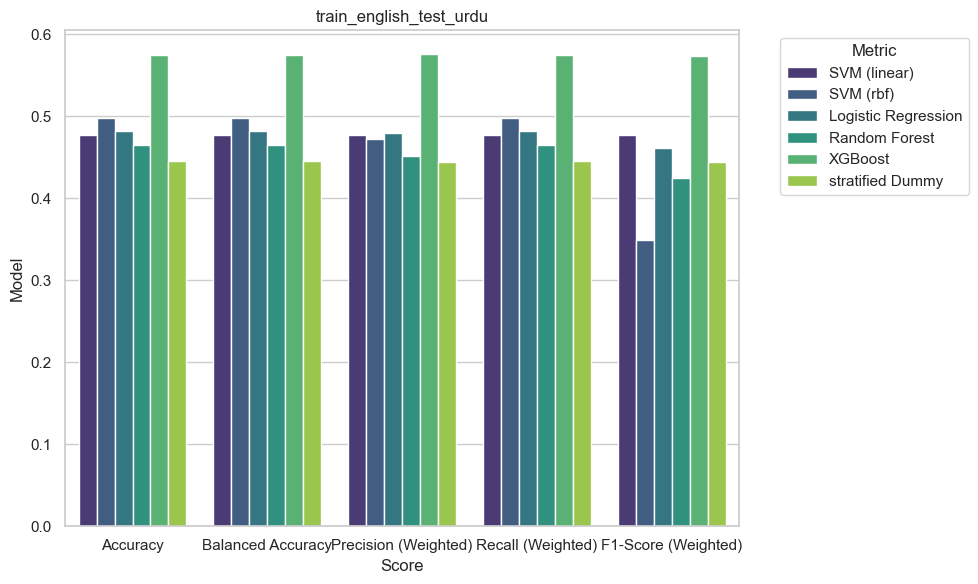

In [9]:
plot_results(train_english_test_urdu, "train_english_test_urdu")

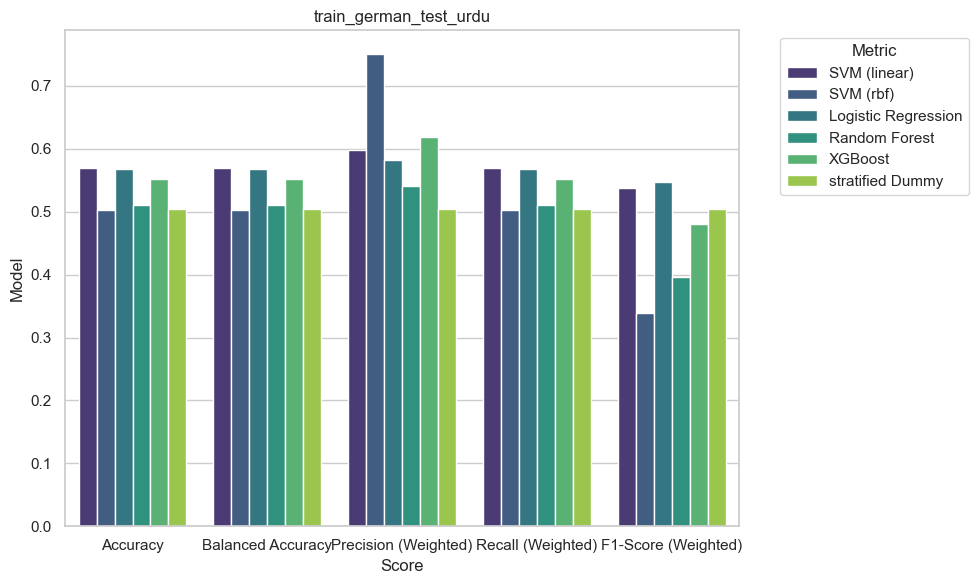

In [15]:
plot_results(train_german_test_urdu, "train_german_test_urdu")

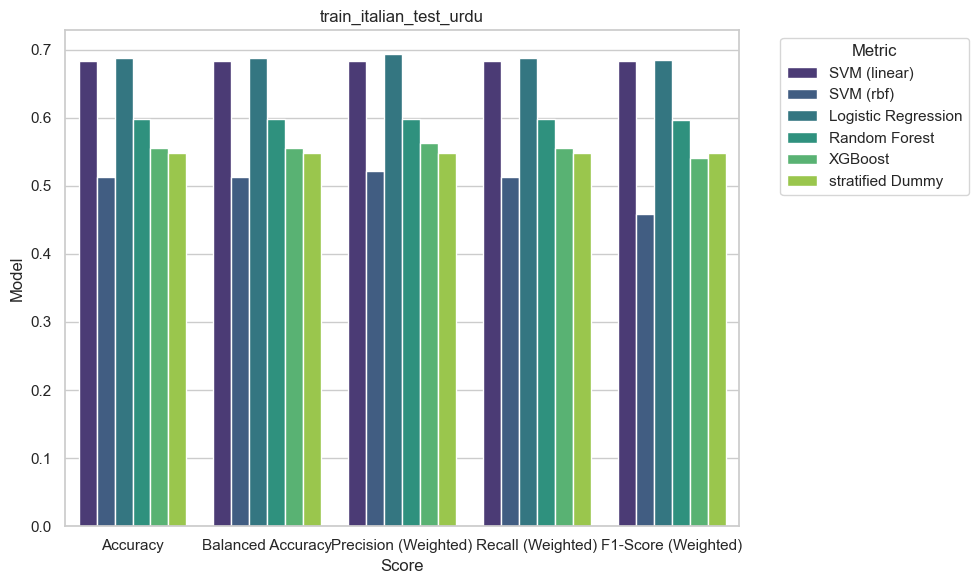

In [17]:
plot_results(train_italian_test_urdu, "train_italian_test_urdu")

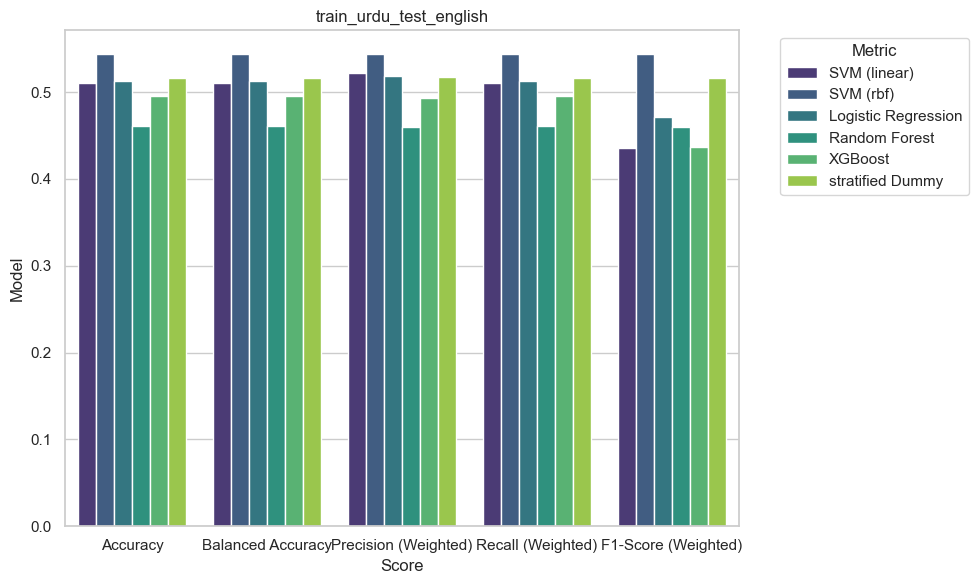

In [18]:
plot_results(train_urdu_test_english, "train_urdu_test_english")

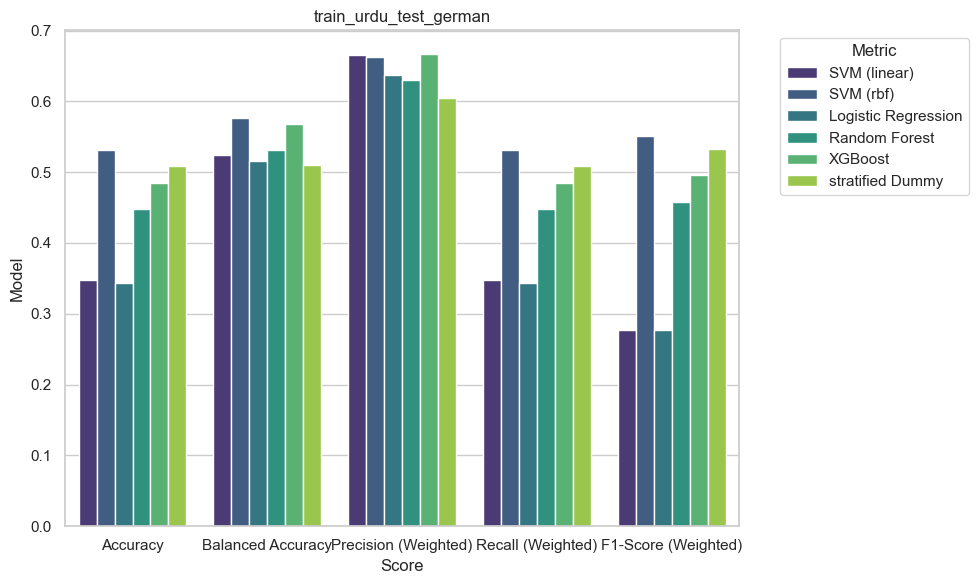

In [19]:
plot_results(train_urdu_test_german, "train_urdu_test_german")

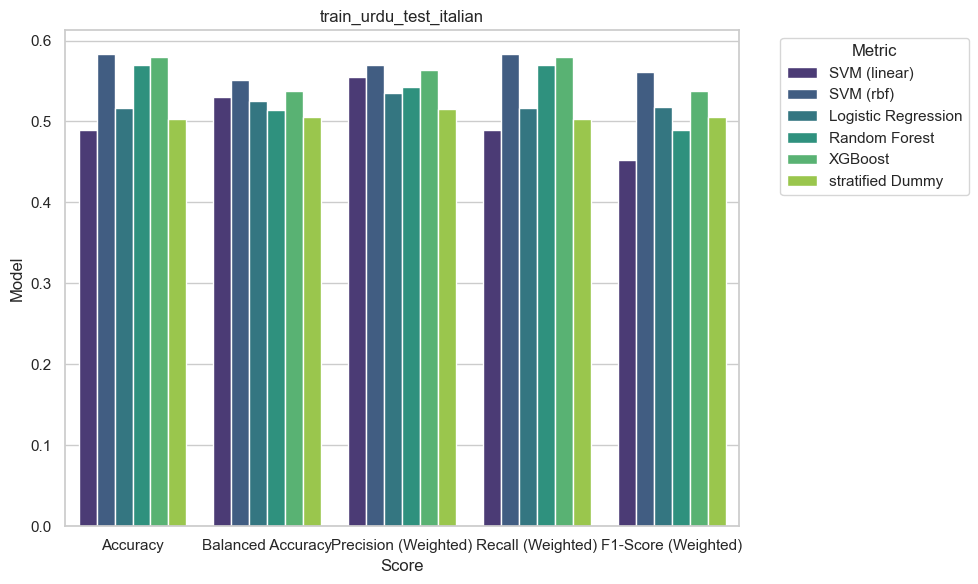

In [20]:
plot_results(train_urdu_test_italian, "train_urdu_test_italian")

In [ ]:
# create plots like in paper
# compare with baseline
# get baseline
df_baseline_accuracy = combined_df_baseline[(combined_df_baseline["Metric"] == "balanced_accuracy") & (combined_df_baseline["Model"] == "XGBoost")]


,Model,Metric,Score,Dataset
8,XGBoost,balanced_accuracy,0.709025,German
38,XGBoost,balanced_accuracy,0.572917,English
68,XGBoost,balanced_accuracy,0.581548,Italian
98,XGBoost,balanced_accuracy,0.789638,Urdu


In [21]:
# training with urdu
datasets = ['German', 'English', 'Italian']
df_train_urdu_accuracy = combined_dfs_train_urdu[(combined_dfs_train_urdu["Metric"] == "Balanced Accuracy") & (combined_dfs_train_urdu["Model"] == "XGBoost")]

# testing with urdu
df_test_urdu_accuracy = combined_dfs_test_urdu[(combined_dfs_test_urdu["Metric"] == "Balanced Accuracy") & (combined_dfs_test_urdu["Model"] == "XGBoost")]


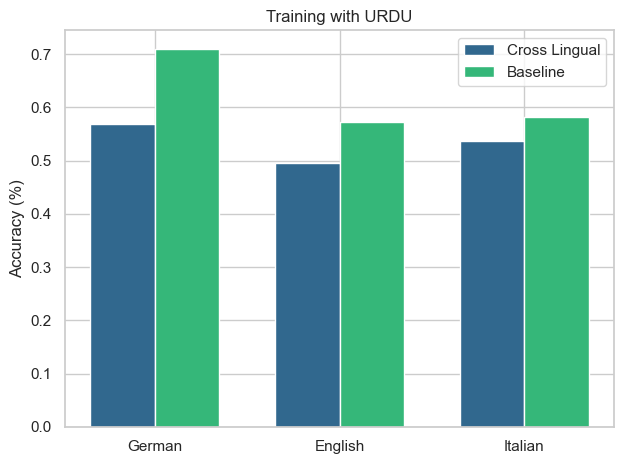

In [13]:
plot_crosslingual_vs_baseline(df_baseline_accuracy, df_train_urdu_accuracy, datasets, "Training with URDU")

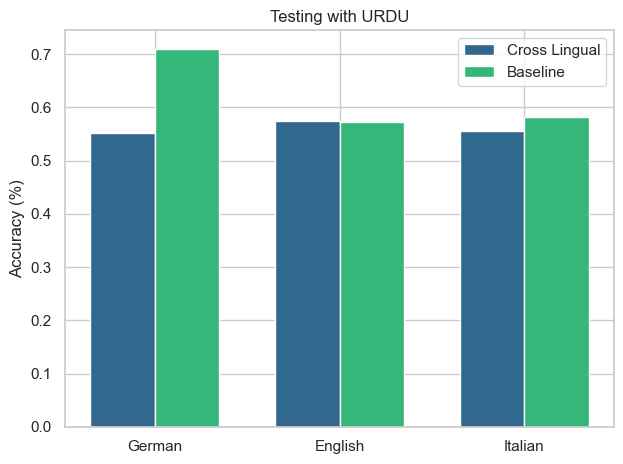

In [14]:
plot_crosslingual_vs_baseline(df_baseline_accuracy, df_test_urdu_accuracy, datasets, "Testing with URDU")